## **Постановка задачи**

#### **Формулировка задачи:**
Создать модель для обнаружения аномалий в потреблении энергии, что может свидетельствовать о неисправностях оборудования, некорректном учете потребления или мошеннических действиях.

#### **Цель:**
Обеспечить более надежное энергоснабжение, сократить потери, снизить затраты на обслуживание и быстрее реагировать на возможные проблемы.

## **Задача**
На основе временных данных о потреблении электроэнергии домохозяйствами обучить модель машинного обучения для выявления аномальных паттернов потребления. Такие паттерны могут сигнализировать о неисправностях оборудования, сбоях в системе учета или других нестандартных ситуациях.

In [1]:
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import os
from glob import glob
%matplotlib inline 
data_dir = f".\\daily_dataset"
file_pattern = os.path.join(data_dir, "*.csv")
all_files = glob(file_pattern)
df_list = [pd.read_csv(file) for file in all_files]
data = pd.concat(df_list, ignore_index=True)
data

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...
3510428,MAC005019,2014-02-24,0.0915,0.091938,0.192,48,0.029466,4.413,0.046
3510429,MAC005019,2014-02-25,0.0735,0.251104,1.455,48,0.369093,12.053,0.029
3510430,MAC005019,2014-02-26,0.0740,0.117604,0.554,48,0.112632,5.645,0.031
3510431,MAC005019,2014-02-27,0.0605,0.086521,0.449,48,0.076162,4.153,0.029


In [2]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB


In [3]:
data.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,3.510403e+06,3.510403e+06,3.510403e+06,3.510433e+06,3.499102e+06,3.510403e+06,3.510403e+06
mean,1.587395e-01,2.117305e-01,8.345210e-01,4.780364e+01,1.726673e-01,1.012414e+01,5.962578e-02
std,1.701865e-01,1.908460e-01,6.683156e-01,2.810982e+00,1.531208e-01,9.128793e+00,8.701312e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.700000e-02,9.808333e-02,3.460000e-01,4.800000e+01,6.911626e-02,4.682000e+00,2.000000e-02
50%,1.145000e-01,1.632917e-01,6.880000e-01,4.800000e+01,1.327910e-01,7.815000e+00,3.900000e-02
75%,1.910000e-01,2.624583e-01,1.128000e+00,4.800000e+01,2.293124e-01,1.256900e+01,7.100000e-02
max,6.970500e+00,6.928250e+00,1.076100e+01,4.800000e+01,4.024569e+00,3.325560e+02,6.524000e+00


In [4]:
data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')

* LCLid - Идентификатор домохозяйства или устройства смарт-метра.

* day - Дата или день, к которому относятся данные.

* energy_median - Медианное значение потребления энергии за день для данного домохозяйства.

* energy_mean - Среднее потребление энергии за день.

* energy_max - Максимальное значение потребления энергии за день.

* energy_count - Количество измерений энергии, проведенных за день.

* energy_std - Стандартное отклонение потребления энергии за день.

* energy_sum - Суммарное потребление энергии за день.

* energy_min - Минимальное значение потребления энергии за день.

In [5]:
data.nunique()

LCLid               5566
day                  829
energy_median      10374
energy_mean       359433
energy_max          6425
energy_count          44
energy_std       3127316
energy_sum        419516
energy_min          2149
dtype: int64

## Проверим количество пропущенных значений для каждой колонны:

In [6]:
data.isna().sum()

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

## Процент пропущенных полей:

In [7]:
print(data.isna().sum().sum() / (len(data) * len(data.columns)) * 100)

0.03633929679520067


## Количество элементов в каждом классе:

In [8]:
data_copy = data.copy()
bins = [0, 0.1, 0.2, 0.4, 0.6]  # Задайте диапазоны, соответствующие вашим данным
labels = ['Very Low', 'Low', 'Medium', 'High'] 
y = data_copy['energy_mean']
data_copy['energy_category'] = pd.cut(y, bins=bins, labels=labels, right=False)
data_copy['energy_category'].value_counts()

energy_category
Low         1241924
Medium      1000727
Very Low     905731
High         229082
Name: count, dtype: int64

# Исключим ненужные данные

In [9]:
data_copy = data_copy.drop(['LCLid', 'day'], axis=1)
print(data_copy.columns)
print('len: ', len(data_copy.columns))
data_copy

Index(['energy_median', 'energy_mean', 'energy_max', 'energy_count',
       'energy_std', 'energy_sum', 'energy_min', 'energy_category'],
      dtype='object')
len:  8


,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,energy_category
0,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Low
1,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Medium
2,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Medium
3,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Medium
4,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Medium
...,...,...,...,...,...,...,...,...
3510428,0.0915,0.091938,0.192,48,0.029466,4.413,0.046,Very Low
3510429,0.0735,0.251104,1.455,48,0.369093,12.053,0.029,Medium
3510430,0.0740,0.117604,0.554,48,0.112632,5.645,0.031,Low
3510431,0.0605,0.086521,0.449,48,0.076162,4.153,0.029,Very Low


# Избавляемся от выбросов

In [10]:
data_copy = data_copy[data_copy['energy_mean'] > 0]
data_copy = data_copy[data_copy['energy_max'] > 0]
data_copy = data_copy[data_copy['energy_min'] >= 0]
data_copy = data_copy[data_copy['energy_sum'] > 0]
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
data_copy = remove_outliers(data_copy, 'energy_mean')
data_copy = remove_outliers(data_copy, 'energy_max')
data_copy = remove_outliers(data_copy, 'energy_min')
data_copy = remove_outliers(data_copy, 'energy_sum')
data_copy = data_copy.drop_duplicates()
data_copy.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,2.993383e+06,2.993383e+06,2.993383e+06,2.993383e+06,2.993249e+06,2.993383e+06,2.993383e+06
mean,1.167356e-01,1.598881e-01,6.832418e-01,4.795484e+01,1.381292e-01,7.666551e+00,4.152406e-02
std,7.263002e-02,8.868765e-02,4.468356e-01,9.293240e-01,9.478471e-02,4.254207e+00,3.020401e-02
min,0.000000e+00,2.083333e-05,1.000000e-03,1.000000e+00,0.000000e+00,1.000000e-03,0.000000e+00
25%,6.200000e-02,9.087500e-02,3.160000e-01,4.800000e+01,6.369307e-02,4.356000e+00,1.800000e-02
50%,1.015000e-01,1.447708e-01,6.050000e-01,4.800000e+01,1.177130e-01,6.941000e+00,3.500000e-02
75%,1.570000e-01,2.155625e-01,9.650000e-01,4.800000e+01,1.936786e-01,1.033700e+01,5.900000e-02
max,7.110000e-01,5.089688e-01,2.097000e+00,4.800000e+01,7.311101e-01,1.997000e+01,1.340000e-01


# Анализ данных
#### Визуализировать данные и вычислить основные характеристики

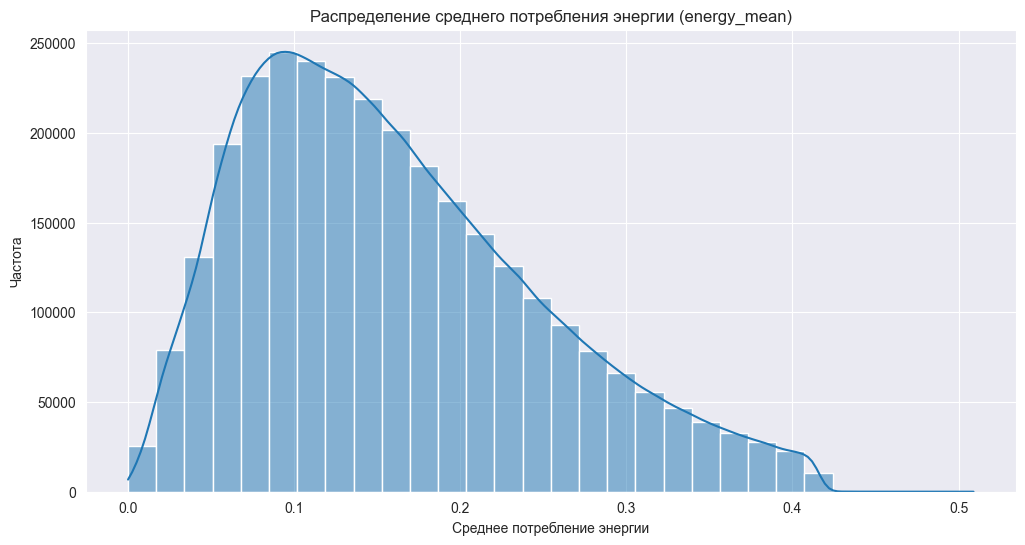

In [11]:
import seaborn as sns
data_copy.ffill()
plt.figure(figsize=(12, 6))
sns.histplot(data_copy['energy_mean'], bins=30, kde=True)
plt.title('Распределение среднего потребления энергии (energy_mean)')
plt.xlabel('Среднее потребление энергии')
plt.ylabel('Частота')
plt.show()

In [12]:
Energy_category = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3
}
data_copy['energy_category'] = data_copy['energy_category'].map(Energy_category)
data_copy

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,energy_category
0,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,1
1,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,2
2,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,2
3,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,2
4,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,2
...,...,...,...,...,...,...,...,...
3510427,0.1180,0.179563,0.759,48,0.175669,8.619,0.048,1
3510428,0.0915,0.091938,0.192,48,0.029466,4.413,0.046,0
3510429,0.0735,0.251104,1.455,48,0.369093,12.053,0.029,2
3510430,0.0740,0.117604,0.554,48,0.112632,5.645,0.031,1


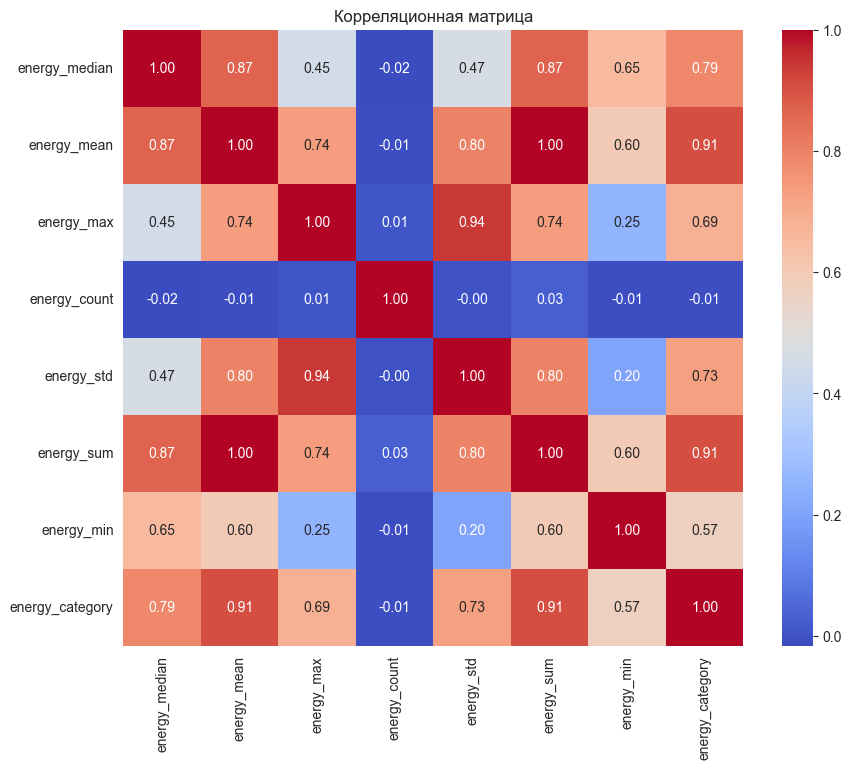

In [13]:
correlation_matrix = data_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

### Проведем нормализацию

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_copy[['energy_mean']])
data_copy = data_copy.dropna()
X = data_copy.drop('energy_category', axis=1)
Y = data_copy['energy_category']  # метка, которая была создана вами

N_train = int(len(X) * 0.8)
N_test = len(X) - N_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    train_size = N_train, test_size = N_test,
                                                    stratify = Y, random_state = 15)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# K-ближайших

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

y_test_predict = knn.predict(X_test)
err_test = 1 - knn.score(X_test, Y_test)
err_train = 1 - knn.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.4512237748366177%
Ошибка на тесте: 1.0667334836715892%


In [16]:
from sklearn.metrics import rand_score

rand_s = rand_score(Y_test, y_test_predict)
print('Оценка RAND: ', rand_s)

Оценка RAND:  0.9864775400118942


Метод k-ближайших подходит для данного датасета, но расмотрим другие

# PCA

In [17]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
scaled_data_train = pd.DataFrame(X_train_std)
scaled_data_test = pd.DataFrame(X_test_std)

<Axes: >

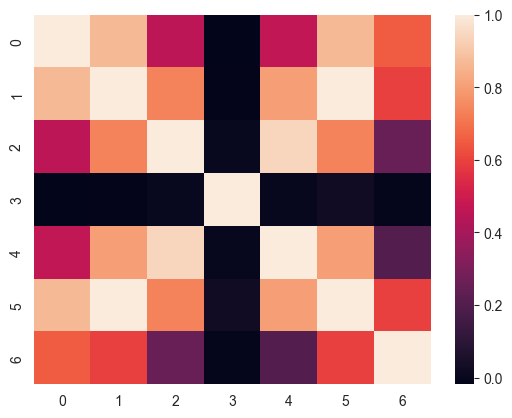

In [19]:
sns.heatmap(scaled_data_train.corr())

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X — ваши данные с числовыми признаками

# Применение PCA
pca = PCA(n_components=6)  
X_pca = pca.fit_transform(X_scaled)
print(len(X_pca[:, 0]),len( X_pca[:, 1]),len(y))

2993249 2993249 3510433


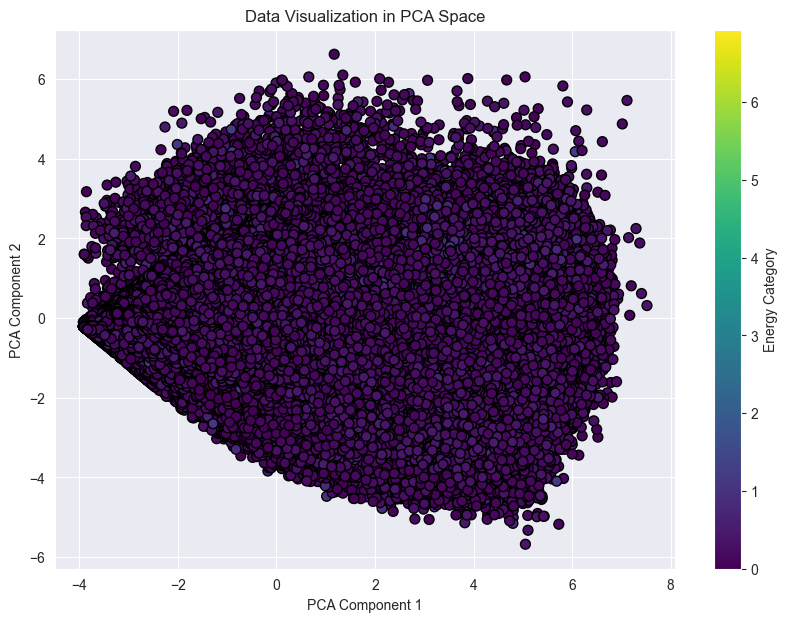

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y[:len( X_pca[:, 1])], cmap='viridis', edgecolor='k', s=50)  # y — метки классов
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Visualization in PCA Space')
plt.colorbar(label='Energy Category')
plt.show()

In [22]:
explained_variance = pca.explained_variance_ratio_
print("Доля объясненной дисперсии каждой компонентой:", explained_variance)
print("Суммарная доля объясненной дисперсии:", explained_variance.sum())

Доля объясненной дисперсии каждой компонентой: [0.62969618 0.16200479 0.1428506  0.04987395 0.01367267 0.00186966]
Суммарная доля объясненной дисперсии: 0.9999678554620928


Метод PCA позволил сократить размерность данных до шести компонент, сохранив при этом 99.99% исходной дисперсии. Первая компонента объясняет 62.97% дисперсии, а добавление каждой последующей компоненты постепенно увеличивает долю объяснённой дисперсии, что позволяет учитывать почти всю информацию исходных данных. Это указывает на высокую степень структурированности данных и значительную корреляцию между признаками.

Использование двух-трёх компонент может быть достаточным для визуализации и первичного анализа, так как они суммарно объясняют около 79% дисперсии. Однако для задач, требующих более детального анализа и точности, рекомендуется использовать до шести компонент, чтобы минимизировать потерю информации.

# Теперь попробуем использовать Random forest

In [23]:
from types import new_class
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

In [24]:
pred_labeles = rfc.predict(X_test)
rand_s = rand_score(Y_test, pred_labeles)
print('Оценка RAND: ', rand_s)
# 3. Предсказания и оценка
from sklearn.metrics import classification_report, confusion_matrix

# Оценка качества модели
print("Classification Report:\n", classification_report(Y_test, pred_labeles))
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred_labeles))

Оценка RAND:  0.9998737695420703
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    176080
           1       1.00      1.00      1.00    245702
           2       1.00      1.00      1.00    172860
           3       1.00      1.00      1.00      4008

    accuracy                           1.00    598650
   macro avg       1.00      1.00      1.00    598650
weighted avg       1.00      1.00      1.00    598650

Confusion Matrix:
 [[176070     10      0      0]
 [    16 245667     19      0]
 [     0      8 172852      0]
 [     0      0      2   4006]]


Модель Random Forest продемонстрировала почти идеальные результаты, что может указывать на то, что:

Данные хорошо разделимы по классам, и признаки обладают высокой информативностью.
Переобучение может быть потенциальной проблемой, если тестовые и обучающие данные слишком схожи. Дополнительная валидация или кросс-валидация могут подтвердить обобщающую способность модели.
В целом, модель может считаться очень успешной для задачи классификации потребления энергии.

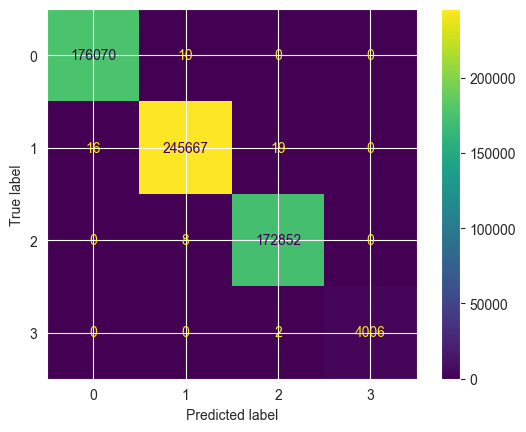

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pred_labeles, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

Найдем оптимальное значение гиперпараметра n_estimators (количество деревьев)


In [26]:
n_estimators_arr = [i for i in range(1, 10)] + [i for i in range(10, 50, 10)]
test_err = []
train_err = []
for n in n_estimators_arr:
    rfc_model = RandomForestClassifier(n_estimators = n)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    print('n:', n)

n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 20
n: 30
n: 40


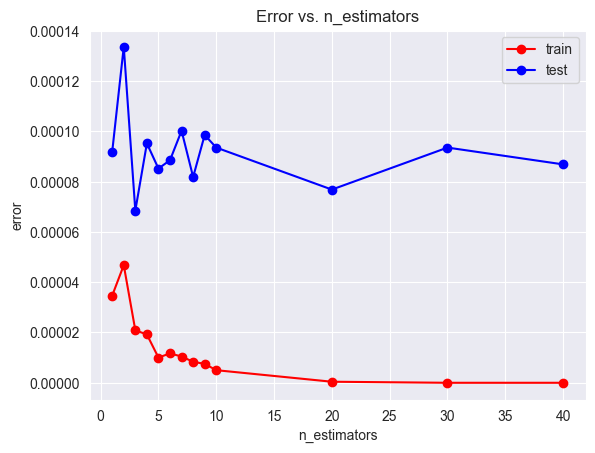

In [27]:
plt.plot(n_estimators_arr, train_err, 'r-o', label = 'train')
plt.plot(n_estimators_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [28]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 6.848743005094796e-05


Теперь рассмотрим зависимость от параметра max_depth (максимальная глубина дерева)


In [29]:
max_depth_arr = [i for i in range(1, 10)] + [i for i in range(10, 100, 10)]
test_err = []
train_err = []
for depth in max_depth_arr:
    rfc_model = RandomForestClassifier(max_depth = depth)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    print('depth:', depth)

depth: 1
depth: 2
depth: 3
depth: 4
depth: 5
depth: 6
depth: 7
depth: 8
depth: 9
depth: 10
depth: 20
depth: 30
depth: 40
depth: 50
depth: 60
depth: 70
depth: 80
depth: 90


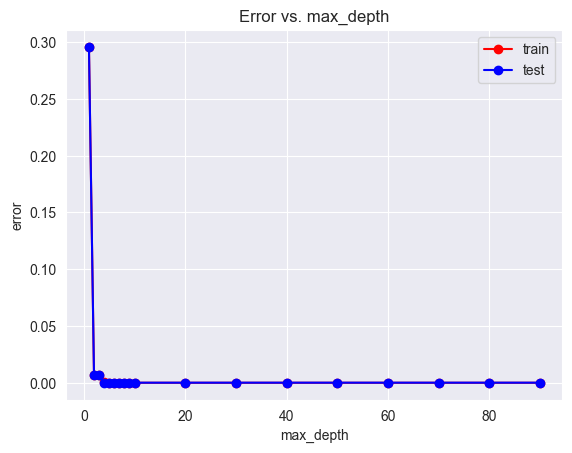

In [30]:
plt.plot(max_depth_arr, train_err, 'r-o', label = 'train')
plt.plot(max_depth_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend()

In [31]:
rfc = RandomForestClassifier(random_state=40)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=40)

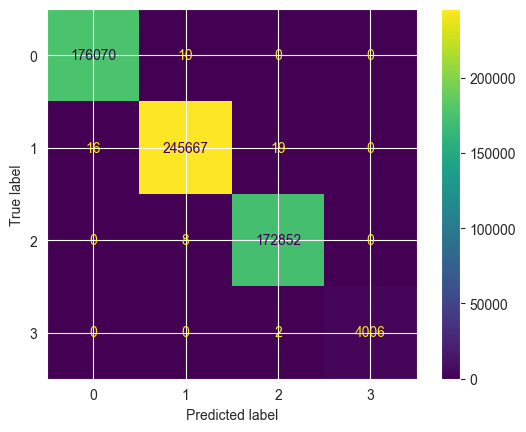

In [32]:
cm = confusion_matrix(Y_test, pred_labeles, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [35]:
pred_labels_test = rfc.predict(X_test)
rand_s_test = rand_score(Y_test, pred_labels_test)
print('Оценка RAND на тестовой выборке:', rand_s_test)

Оценка RAND на тестовой выборке: 0.99987743537586


In [36]:
pred_labels_train = rfc.predict(X_train)
rand_s_train = rand_score(Y_train, pred_labels_train)
print('Оценка RAND на обучающей выборке:', rand_s_train)

Оценка RAND на обучающей выборке: 1.0


# Вывод

Были использованы метрики классификации Classification Report и Confusion Matrix для детальной оценки точности, полноты и F1-score для каждого класса.

* Classification Report показал идеальные результаты с точностью, полнотой и F1-score, равными 1.00 для всех классов. Это подтверждает, что модель очень точно классифицирует данные, не допуская ошибок.
С Confusion Matrix также указывает на минимальные ошибки, что является хорошим индикатором. Почти все предсказания модели совпадают с истинными метками, что свидетельствует о высоком качестве модели для каждой из категорий.

Grid Search для подбора гиперпараметров: Присутствует код с использованием GridSearchCV для подбора оптимальных гиперпараметров, таких как:

* Количество деревьев (n_estimators): Больше деревьев может повысить стабильность и точность, но увеличивает время обучения.
* Глубина деревьев (max_depth): Ограничение глубины помогает избежать переобучения.
* Минимальное количество выборок для разбиения узла (min_samples_split): Помогает контролировать сложность модели.
Результаты подбора гиперпараметров в файле позволяют оптимизировать модель и улучшить её обобщающую способность на новых данных.

Оценка RAND на обучающей и тестовой выборках:

* RAND на тестовой выборке: 0.99987743537586 показывает почти идеальное соответствие между предсказаниями и истинными метками, что говорит о хорошем обобщении модели.
* RAND на обучающей выборке: 1.0 указывает на идеальное соответствие, что может указывать на переобучение.

### Общие выводы по методам

Данные методы подтверждают высокое качество и точность модели на текущих данных.
Указывают на необходимость проведения дополнительных тестов на других выборках или на кросс-валидации, чтобы исключить вероятность переобучения.
Grid Search помог подобрать гиперпараметры для улучшения модели.
Эти методы дополняют анализ и подтверждают, что модель Random Forest хорошо справляется с задачей классификации, достигая почти идеальных результатов на текущих данных. В будущем можно рассмотреть другие методы, например, нейронные сети, которые мы рассмотрим в будущем.